In [435]:
import os
import numpy as np

In [471]:
# file_paths=["./BD_ICount_DLX.txt","./BD_ICount_CP.txt","./BD_ICount_BFS.txt"][2:3]
# file_paths=["BD_StatLS_BFS.txt","./BD_ICount_BFS.txt","BD_StatBranch_BFS.txt","BD_Methods_BFS.txt"]
# file_paths=["BD_StatLS_DLX.txt","./BD_ICount_DLX.txt","BD_StatBranch_DLX.txt","BD_Methods_DLX.txt"]
file_paths=["BD_StatLS_CP.txt","./BD_ICount_CP.txt","BD_StatBranch_CP.txt","BD_Methods_CP.txt"]
# file_paths=["BD_StatLS_CP.txt","./BD_ICount_CP.txt","BD_StatBranch_CP.txt","BD_StatLS_BFS.txt","./BD_ICount_BFS.txt","BD_StatBranch_BFS.txt","BD_StatLS_DLX.txt","./BD_ICount_DLX.txt","BD_StatBranch_DLX.txt",]

In [472]:
lines=[]

for file_path in file_paths:
    with open(file_path,"r") as f:
        lines+=f.readlines()


In [473]:
lines


['> Query:\ts=CP&un=81&n1=9&n2=9&i=SUDOKU_PUZZLE_9x9_101\n',
 'Load Store Summary:\n',
 'Field load:      3187\n',
 'Field store: 20\n',
 'Regular load: 34720820\n',
 'Regular store: 34696592\n',
 '\n',
 '\n',
 '> Query:\ts=CP&un=81&n1=9&n2=9&i=SUDOKU_PUZZLE_9x9_102\n',
 'Load Store Summary:\n',
 'Field load:      3384\n',
 'Field store: 7\n',
 'Regular load: 36780316\n',
 'Regular store: 36754825\n',
 '\n',
 '\n',
 '> Query:\ts=CP&un=81&n1=9&n2=9&i=SUDOKU_PUZZLE_9x9_103\n',
 'Load Store Summary:\n',
 'Field load:      4248\n',
 'Field store: 7\n',
 'Regular load: 50018871\n',
 'Regular store: 49986390\n',
 '\n',
 '\n',
 '> Query:\ts=CP&un=81&n1=9&n2=9&i=SUDOKU_PUZZLE_9x9_104\n',
 'Load Store Summary:\n',
 'Field load:      3260\n',
 'Field store: 7\n',
 'Regular load: 33838708\n',
 'Regular store: 33814510\n',
 '\n',
 '\n',
 '> Query:\ts=CP&un=81&n1=9&n2=9&i=SUDOKU_PUZZLE_9x9_105\n',
 'Load Store Summary:\n',
 'Field load:      3409\n',
 'Field store: 7\n',
 'Regular load: 39133438\n'

In [474]:
# for line in lines:
# #     if "Query" in line:
# #         print(line)
#     if "ICounter" in line:
#         ic.append(int(line.split("\t")[-1]))
lines[-1].startswith("Not Taken")

False

In [475]:
def get_array(filter_name):
    a=[]
    
    for line in lines:
#     if "Query" in line:
#         print(line)
        if line.startswith(filter_name):
#             try:
#             a.append(int(line.split("\t")[-1]))
            a.append(int(line.split(":")[-1]))
    
    a=np.array(a)
    
    print("{} - mean:{}, std:{}, min:{}, max:{}".format(filter_name,a.mean(),a.std(),a.min(),a.max()))
    
    return a
    

In [476]:
ic=get_array('> ICounter')
bc=get_array('> BCounter')
mc=get_array('> MCounter')



fl=get_array('Field load')
fs=get_array('Field store')
rl=get_array('Regular load')
rs=get_array('Regular store')

taken=get_array('Field load')
not_taken=get_array('Field load')

methods=get_array('Methods:')[:len(ic)]

> ICounter - mean:1425387648.7272727, std:1437126904.4143894, min:236751531, max:4074278913
> BCounter - mean:610819222.3636364, std:615845724.2016894, min:101455681, max:1745930544
> MCounter - mean:2738.4545454545455, std:2415.25144046353, min:712, max:7307
Field load - mean:26093.454545454544, std:29934.532054783198, min:3187, max:84744
Field store - mean:8.181818181818182, std:3.737237234744448, min:7, max:20
Regular load - mean:203740300.45454547, std:205425224.49724478, min:33838708, max:582387277
Regular store - mean:203579847.27272728, std:205253813.4130565, min:33814510, max:581896328
Field load - mean:26093.454545454544, std:29934.532054783198, min:3187, max:84744
Field load - mean:26093.454545454544, std:29934.532054783198, min:3187, max:84744
Methods: - mean:3272.657142857143, std:3211.714663921591, min:706, max:12186


In [443]:
import inspect



def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]


In [444]:
from scipy.stats import spearmanr

In [417]:
np.corrcoef(ic,not_taken)

array([[1.        , 0.97322093],
       [0.97322093, 1.        ]])

In [418]:
for metric in [bc,mc,fl,fs,rl,rs,taken,not_taken]:
    corr=np.corrcoef(ic,metric)[0][1]
    print("metric: {} corr:{}".format(retrieve_name(metric)[0],corr))

metric: bc corr:0.9999999997054556
metric: mc corr:0.9975749519004097
metric: fl corr:0.9732209308993512
metric: fs corr:-0.27227206518275104
metric: rl corr:0.9999999895189206
metric: rs corr:0.9999999984023467
metric: taken corr:0.9732209308993512
metric: not_taken corr:0.9732209308993512


In [434]:
len(methods)

36

In [445]:
np.corrcoef(ic,methods[:len(ic)])

array([[1.        , 0.99757495],
       [0.99757495, 1.        ]])

In [420]:
spearmanr(ic,not_taken)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [421]:
spearmanr(ic,fs)

SpearmanrResult(correlation=-0.2004561009344103, pvalue=0.5545252303435375)

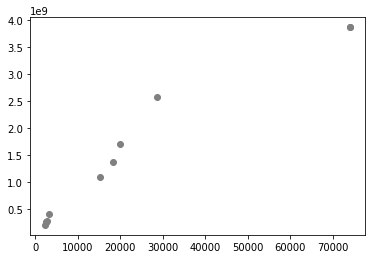

In [446]:
plt.scatter(taken, ic,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### linear regression

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [456]:
X_test=mc.reshape(-1,1)
y_test=ic.reshape(-1,1)

In [457]:
model = LinearRegression()

In [458]:
model.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [459]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[-1.25571856e+08]
[[457462.1961637]]


In [460]:
y_pred = model.predict(X_test)

In [461]:
y_pred.reshape(-1)

array([2.82026961e+08, 2.63271011e+08, 3.79923871e+08, 2.23471800e+08,
       2.61898625e+08, 1.21067522e+09, 2.31407404e+09, 1.66081802e+09,
       1.41607575e+09, 3.92662828e+09, 3.92662828e+09])

In [462]:
import matplotlib.pyplot as plt

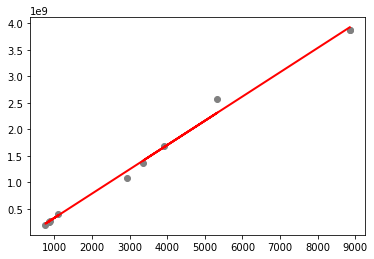

In [463]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()